In [32]:
import anndata as ad
import scanpy as sc
import pandas as pd

In [22]:
adata = ad.read('write/results.h5ad')

In [23]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [24]:
selected_neighbors_key='10_nn'
leiden_res_key='leiden_res_0.01'

In [25]:
adata

AnnData object with n_obs × n_vars = 5488 × 15
    obs: 'leiden_res_0.001_10_nn', 'leiden_res_0.01_10_nn', 'leiden_res_0.015_10_nn', 'leiden_res_0.02_10_nn', 'leiden_res_0.001_12_nn', 'leiden_res_0.01_12_nn', 'leiden_res_0.015_12_nn', 'leiden_res_0.02_12_nn'
    var: 'mean', 'std'
    uns: '10_nn', '12_nn', 'leiden', 'pca'
    obsm: 'X_pca', 'X_umap_10_nn', 'X_umap_12_nn'
    varm: 'PCs'
    obsp: '10_nn_connectivities', '10_nn_distances', '12_nn_connectivities', '12_nn_distances'

In [26]:
adata.obsm['X_umap'] = adata.obsm['X_umap_'+selected_neighbors_key]

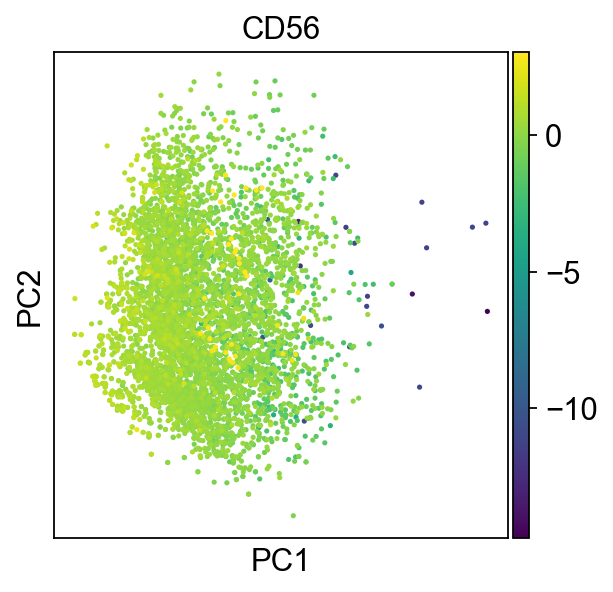

In [27]:
sc.pl.pca(adata, color='CD56')

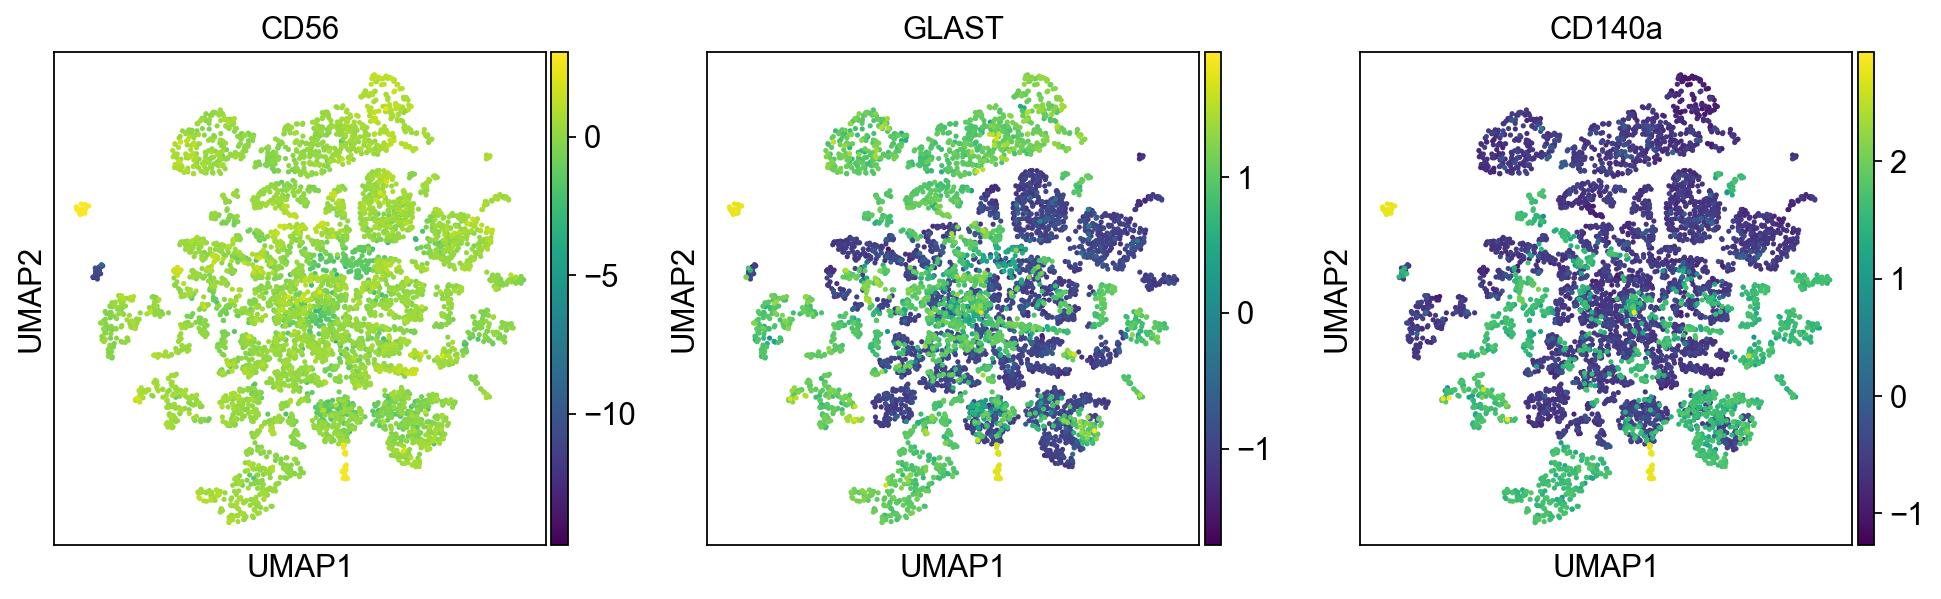

In [28]:
sc.pl.umap(adata, color=['CD56','GLAST','CD140a'], neighbors_key=selected_neighbors_key)

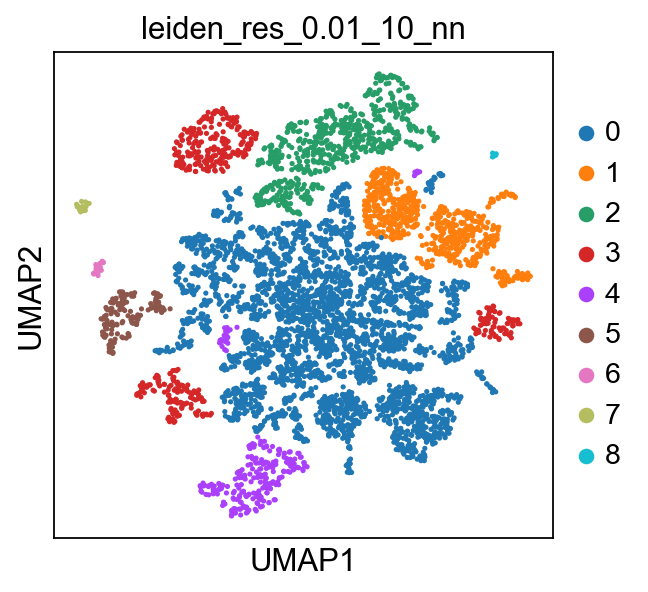

In [29]:
sc.pl.umap(adata, color=leiden_res_key+'_'+selected_neighbors_key)

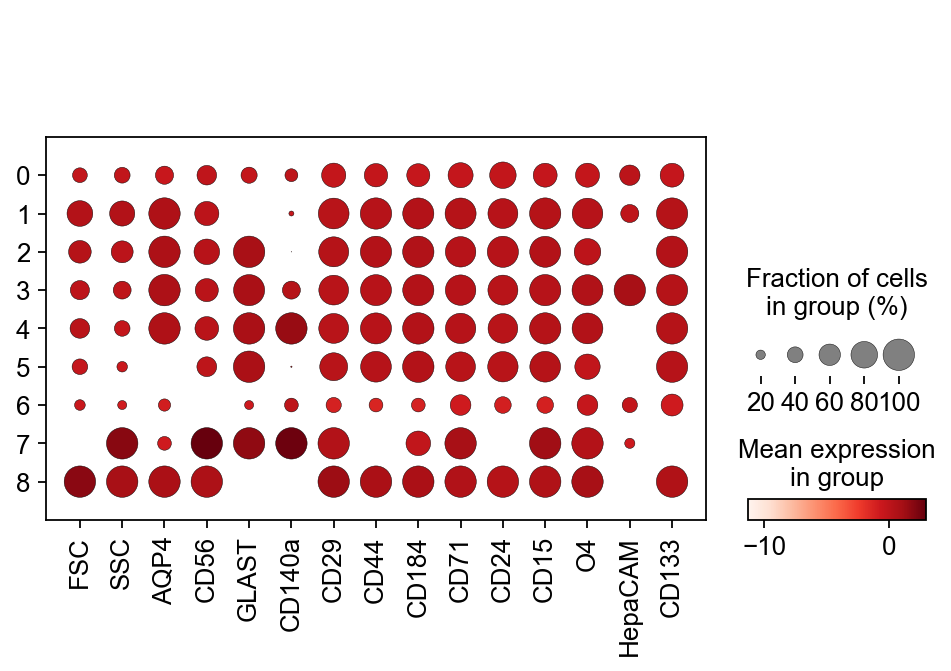

In [30]:
sc.pl.dotplot(adata, adata.var.index, groupby=leiden_res_key+'_'+selected_neighbors_key)

The following two blocks are optional. They can add a column from an 'unclean' original dataset and add it as categorical data to be plotted in the umap.

In [38]:
original_dataset = 'dataset.csv'
column_to_add = 'Batch'

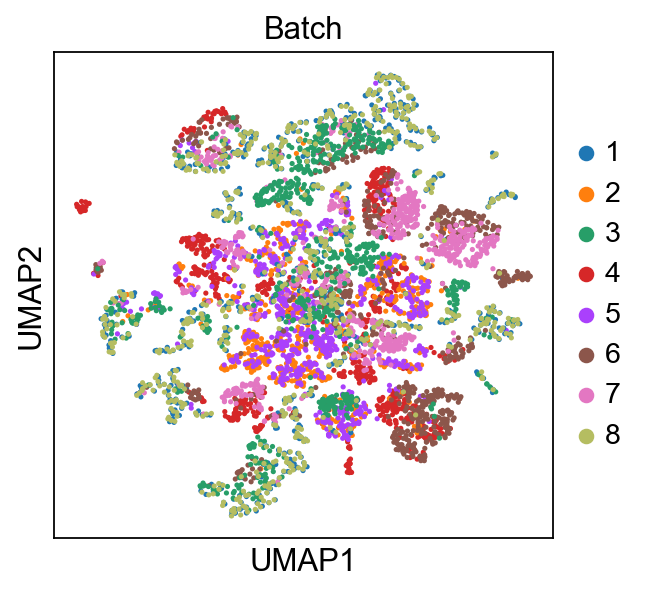

In [89]:
dataframe = pd.read_csv(original_dataset)

batch_set = set(dataframe[column_to_add])
batch_number_dict = {}
i = 1
for item in batch_set:
	batch_number_dict[item] = i
	i += 1

dataframe.set_index(adata.obs.index, inplace=True)
adata.obs[column_to_add] = dataframe[column_to_add].map(batch_number_dict).astype('category')
sc.pl.umap(adata, color=column_to_add)